### 数据分析步骤：

1.获取数据

2.数据预处理

3.数据分析

4.数据挖掘

### pandas数据结构

In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

#### Series:一维

In [5]:
s=Series([1,2,3], index=['a','b','c'])

In [6]:
s

a    1
b    2
c    3
dtype: int64

In [7]:
np.max(s)

3

In [9]:
s.name='rank'

In [10]:
s.index.name='name'

In [11]:
s

name
a    1
b    2
c    3
Name: rank, dtype: int64

#### DataFrame
表格型数据结构

每列可以是不同的类型

In [15]:
#创建DataFrame
sdata1={'name':['a','b','c'],'rank':[1,2,3],'score':[99,87,45]}

In [16]:
df1 =DataFrame(sdata1)

In [17]:
df1

,name,rank,score
0,a,1,99
1,b,2,87
2,c,3,45


In [18]:
df1.columns

Index([u'name', u'rank', u'score'], dtype='object')

In [19]:
df3=DataFrame(sdata1,columns=['score','name','rank','class'
],index=['1','2','3'])

In [20]:
df3

,score,name,rank,class
1,99,a,1,NaN
2,87,b,2,NaN
3,45,c,3,NaN


In [21]:
df3.reindex(['1','2','3','4'])

,score,name,rank,class
1,99.0,a,1.0,NaN
2,87.0,b,2.0,NaN
3,45.0,c,3.0,NaN
4,NaN,NaN,NaN,NaN


#### 引用DataFrame

,score,name,rank,class
1,99,a,1,NaN
2,87,b,2,NaN
3,45,c,3,NaN


In [25]:
df3['score'] #列

1    99
2    87
3    45
Name: score, dtype: int64

In [26]:
df3.ix['1'] #行

score     99
name       a
rank       1
class    NaN
Name: 1, dtype: object

In [29]:
df3[df3['score']>60]

,score,name,rank,class
1,99,a,1,NaN
2,87,b,2,NaN


In [30]:
del df3['class']

In [31]:
df3

,score,name,rank
1,99,a,1
2,87,b,2
3,45,c,3


#### 转换

In [32]:
df3.T

,1,2,3
score,99,87,45
name,a,b,c
rank,1,2,3


In [33]:
df3.reindex(['1','2','3','4'])

,score,name,rank
1,99.0,a,1.0
2,87.0,b,2.0
3,45.0,c,3.0
4,NaN,NaN,NaN


In [34]:
df3.reindex(['1','2','3','4'] ,fill_value=0)

,score,name,rank
1,99,a,1
2,87,b,2
3,45,c,3
4,0,0,0


#### ffill 向前填充;bfill, 向后填充

In [36]:
df3

,score,name,rank
1,99,a,1
2,87,b,2
3,45,c,3


In [37]:
df3.reindex(['0','1','2','3'])

,score,name,rank
0,NaN,NaN,NaN
1,99.0,a,1.0
2,87.0,b,2.0
3,45.0,c,3.0


In [38]:
df3.reindex(['0','1','2','3'],method='bfill')

,score,name,rank
0,99,a,1
1,99,a,1
2,87,b,2
3,45,c,3


In [39]:
df3 ##以上操作并不改变原数据

,score,name,rank
1,99,a,1
2,87,b,2
3,45,c,3


In [42]:
df3.reindex(['1','2','3','4'])

,score,name,rank
1,99.0,a,1.0
2,87.0,b,2.0
3,45.0,c,3.0
4,NaN,NaN,NaN


In [43]:
df3.reindex(['1','2','3','4'],method='ffill')

,score,name,rank
1,99,a,1
2,87,b,2
3,45,c,3
4,45,c,3


In [44]:
df3.drop('1') #删除行

,score,name,rank
2,87,b,2
3,45,c,3


In [45]:
df3

,score,name,rank
1,99,a,1
2,87,b,2
3,45,c,3


In [48]:
df3.drop('score', axis=1) #删除列

,name,rank
1,a,1
2,b,2
3,c,3


In [49]:
df3

,score,name,rank
1,99,a,1
2,87,b,2
3,45,c,3


### 读取数据

In [50]:
pwd

u'/home/xuehaozhe/code'

In [51]:
ls

npm-debug.log  tips.csv  数据挖掘-数据预处理.ipynb


In [52]:
tips=pd.read_csv('tips.csv')

In [54]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [55]:
tip1=pd.read_table('tips.csv',sep=',')

In [78]:
tip1.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [58]:
douban=pd.read_table('douban.dat',sep='::')

/home/xuehaozhe/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [59]:
douban.tail()

,45874270,2348372,4
3648098,1131322,2189780,5
3648099,1131322,1856338,3
3648100,1131322,1322066,3
3648101,1131322,1371409,5
3648102,1131322,2115040,3


In [60]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [61]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### 可视化分析

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt

In [65]:
df1=DataFrame(np.random.randn(10,4),columns=['a','b','c','d'],index=np.arange(0,100,10))

In [67]:
df1

,a,b,c,d
0,-1.708107,0.965808,-0.085240,-0.307631
10,1.367818,0.351245,0.107834,-1.137066
20,1.307803,0.640981,-0.564666,-1.489840
30,0.451707,-1.689178,0.282529,-0.345698
40,-2.616462,0.607488,0.742940,-1.142992
50,0.878240,-1.247141,-0.089928,1.241939
60,0.481987,0.226589,0.627849,2.504601
70,-0.430867,-0.459430,1.627895,-0.579867
80,0.734232,-1.782399,-0.456540,-0.132642
90,-0.116432,-0.469738,-0.332434,-0.773169


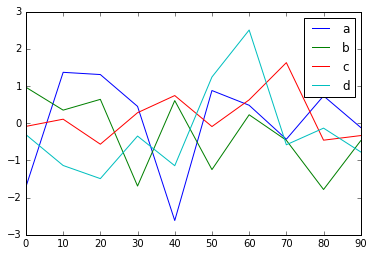

In [68]:
df1.plot()

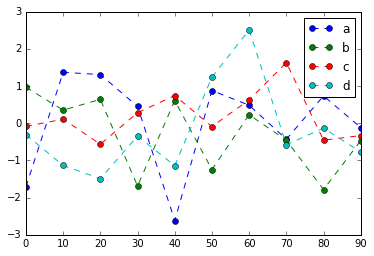

In [69]:
df1.plot(style='o--')

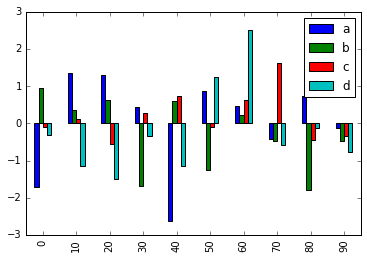

In [71]:
df1.plot(kind='bar')

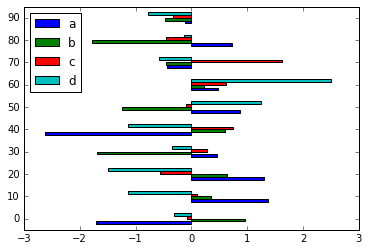

In [72]:
df1.plot(kind='barh')

### 列联表

In [82]:
tip1.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [80]:
count=pd.crosstab(tip1.sex, tip1.day)

In [81]:
count

day,Fri,Sat,Sun,Thur
sex,,,,
Female,9,28,18,32
Male,10,59,58,30


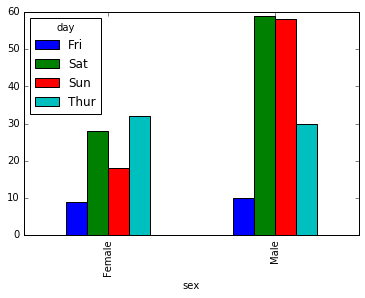

In [83]:
count.plot(kind='bar')

In [85]:
count.T

sex,Female,Male
day,,
Fri,9,10
Sat,28,59
Sun,18,58
Thur,32,30


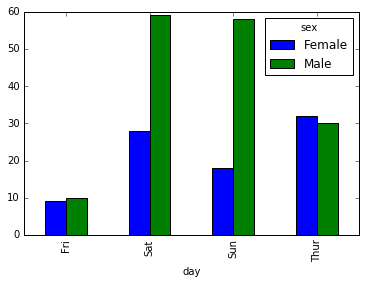

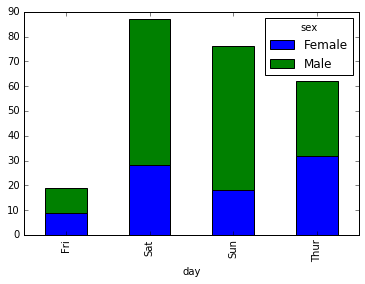

In [84]:
count.T.plot(kind='bar')
count.T.plot(kind='bar',stacked=True)

#### 直方图

In [87]:
tip1['tips_pct']=tip1['tip']/tip1['total_bill']

In [88]:
tip1.head()

,total_bill,tip,sex,smoker,day,time,size,tips_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


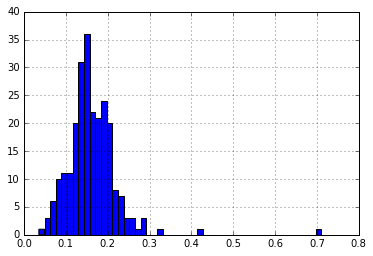

In [92]:
tip1['tips_pct'].hist(bins=50) 

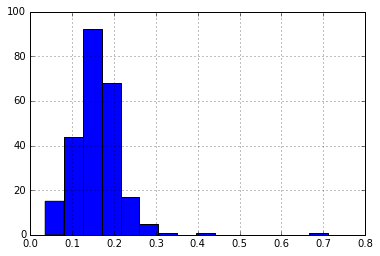

In [94]:
tip1['tips_pct'].hist(bins=15)# 一般情况下 bins= 根号下n 

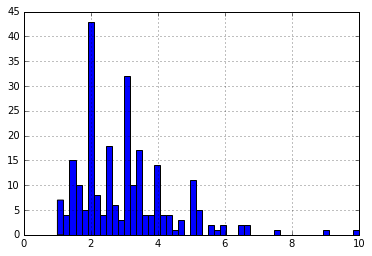

In [98]:
tip1['tip'].hist(bins=50)

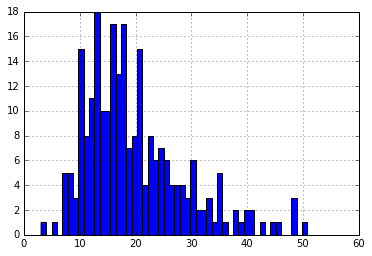

In [99]:
tip1['total_bill'].hist(bins=50)

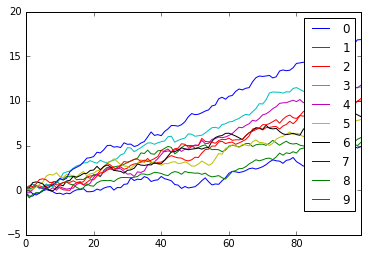

In [100]:
changes=DataFrame(np.random.normal(loc=0.1,scale=0.25,
size=(100,10)))
returns=changes.cumsum(0)
returns.plot()